In [1]:
# Import Pandas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Import db from local library
df=pd.read_csv(r'C:\Users\tshah\NYPD.csv')

In [3]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,238013474,12/18/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,105,97,18-24,M,BLACK,1057636,203954,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)
1,236943583,11/25/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501500,F,K,69,71,25-44,M,BLACK,1014340,171320,40.636868,-73.891586,POINT (-73.89158591899997 40.63686750900007)
2,234938876,10/14/2021,594.0,OBSCENITY 1,116.0,SEX CRIMES,PL 2631100,F,K,61,0,25-44,M,WHITE,995244,155739,40.594145,-73.960415,POINT (-73.96041495199995 40.59414516900005)
3,234788259,10/11/2021,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1501001,F,B,42,71,18-24,M,BLACK,1009058,239616,40.824340,-73.910365,POINT (-73.91036538099996 40.82433953100008)
4,234188790,9/28/2021,578.0,NaN,NaN,NaN,PL 2223001,M,B,44,0,25-44,M,BLACK,1005169,246667,40.843703,-73.924395,POINT (-73.92439508899997 40.84370255600004)


In [4]:
# to fetch column names
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [5]:
# need the column number to drop unwanted column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155507 entries, 0 to 155506
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                155507 non-null  int64  
 1   ARREST_DATE               155507 non-null  object 
 2   PD_CD                     155478 non-null  float64
 3   PD_DESC                   155404 non-null  object 
 4   KY_CD                     155404 non-null  float64
 5   OFNS_DESC                 155404 non-null  object 
 6   LAW_CODE                  155507 non-null  object 
 7   LAW_CAT_CD                154114 non-null  object 
 8   ARREST_BORO               155507 non-null  object 
 9   ARREST_PRECINCT           155507 non-null  int64  
 10  JURISDICTION_CODE         155507 non-null  int64  
 11  AGE_GROUP                 155507 non-null  object 
 12  PERP_SEX                  155507 non-null  object 
 13  PERP_RACE                 155507 non-null  o

In [6]:
# only keeping the columns needed for analysis
df=df.drop(df.columns[[2,4,5,6,9,10,14,15,16,17,18]],axis=1)
df.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,238013474,12/18/2021,RAPE 1,F,Q,18-24,M,BLACK
1,236943583,11/25/2021,"ARSON 2,3,4",F,K,25-44,M,BLACK
2,234938876,10/14/2021,OBSCENITY 1,F,K,25-44,M,WHITE
3,234788259,10/11/2021,"ARSON 2,3,4",F,B,18-24,M,BLACK
4,234188790,9/28/2021,NaN,M,B,25-44,M,BLACK


In [7]:
# print the month name to identify which month had higher crime
df['Month']= pd.DatetimeIndex(df['ARREST_DATE']).month_name(locale='English')
df.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Month
0,238013474,12/18/2021,RAPE 1,F,Q,18-24,M,BLACK,December
1,236943583,11/25/2021,"ARSON 2,3,4",F,K,25-44,M,BLACK,November
2,234938876,10/14/2021,OBSCENITY 1,F,K,25-44,M,WHITE,October
3,234788259,10/11/2021,"ARSON 2,3,4",F,B,18-24,M,BLACK,October
4,234188790,9/28/2021,NaN,M,B,25-44,M,BLACK,September


In [8]:
# how many descriptions are null in dataset
print(df['PD_DESC'].isnull().sum())

103


In [9]:
# replace the missing description in 'PD_DESC' column to other
df['PD_DESC'].fillna('Other',inplace=True)
df.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Month
0,238013474,12/18/2021,RAPE 1,F,Q,18-24,M,BLACK,December
1,236943583,11/25/2021,"ARSON 2,3,4",F,K,25-44,M,BLACK,November
2,234938876,10/14/2021,OBSCENITY 1,F,K,25-44,M,WHITE,October
3,234788259,10/11/2021,"ARSON 2,3,4",F,B,18-24,M,BLACK,October
4,234188790,9/28/2021,Other,M,B,25-44,M,BLACK,September


In [10]:
# removing all the extra numbers and commas from the 'PD_DESC' Column 
df['PD_DESC']=df['PD_DESC'].str.replace('\d+','')
df['PD_DESC']=df['PD_DESC'].str.replace(',','')
df.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Month
0,238013474,12/18/2021,RAPE,F,Q,18-24,M,BLACK,December
1,236943583,11/25/2021,ARSON,F,K,25-44,M,BLACK,November
2,234938876,10/14/2021,OBSCENITY,F,K,25-44,M,WHITE,October
3,234788259,10/11/2021,ARSON,F,B,18-24,M,BLACK,October
4,234188790,9/28/2021,Other,M,B,25-44,M,BLACK,September


In [11]:
#arrest_mnt=pd.pivot_table(df,index=['PD_DESC'],columns=['Month'], values=['ARREST_KEY'],aggfunc='count')
#arrest_mnt

In [12]:
# grouping by clean data of 'pd_desc' to see variations
des=df.groupby(['PD_DESC'])['ARREST_KEY'].count()
des

PD_DESC
A.B.C.FALSE PROOF OF AGE            2
ACCOSTINGFRAUDULENT                34
ADM.CODEUNCLASSIFIED MISDEMEA      11
ADM.CODEUNCLASSIFIED VIOLATIO      14
AGGRAVATED CRIMINAL CONTEMPT      240
                                 ... 
WEAPONS POSSESSION  &            4559
WEAPONS POSSESSION ETC           1726
WEAPONSMFRTRANSPORTETC.             6
WEAPONSPROHIBITED USE IMITATI       1
WOUNDSREPORTING OF                  1
Name: ARREST_KEY, Length: 221, dtype: int64

In [13]:
# grouping by age group to understand count by age group
des1=df.groupby(['AGE_GROUP'])['ARREST_KEY'].count()
des1

AGE_GROUP
18-24    28951
25-44    88850
45-64    30608
65+       2298
<18       4800
Name: ARREST_KEY, dtype: int64

In [14]:
# grouping by month to understand total count of cases
mnt=df.groupby(['Month'])['ARREST_KEY'].count()
mnt

Month
April        10424
August       13745
December     12689
February     11653
January      13506
July         13561
June         12850
March        13980
May          11822
November     13068
October      14453
September    13756
Name: ARREST_KEY, dtype: int64

In [15]:
# updating the arrest key column to numeric value
df['ARREST_KEY']=pd.to_numeric(df['ARREST_KEY'],errors='coerce')
df

,ARREST_KEY,ARREST_DATE,PD_DESC,LAW_CAT_CD,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE,Month
0,238013474,12/18/2021,RAPE,F,Q,18-24,M,BLACK,December
1,236943583,11/25/2021,ARSON,F,K,25-44,M,BLACK,November
2,234938876,10/14/2021,OBSCENITY,F,K,25-44,M,WHITE,October
3,234788259,10/11/2021,ARSON,F,B,18-24,M,BLACK,October
4,234188790,9/28/2021,Other,M,B,25-44,M,BLACK,September
...,...,...,...,...,...,...,...,...,...
155502,222884924,1/10/2021,ROBBERYOPEN AREA UNCLASSIFIED,F,B,45-64,M,BLACK,January
155503,223918625,2/3/2021,WEAPONS POSSESSION &,F,K,18-24,M,BLACK,February
155504,224323770,2/13/2021,ASSAULT,M,S,45-64,M,BLACK,February
155505,222599533,1/4/2021,WEAPONS POSSESSION &,F,K,25-44,M,BLACK,January


In [16]:
# understanding how many arrest by month and age group
#mnt_arr = df.groupby(['Month','AGE_GROUP']).size()
#mnt_arr

In [17]:
# counting total arrest by month and age groups in pivot table format, same data as above but in different layout
mnt1=pd.pivot_table(df,index=['Month'],columns=['AGE_GROUP'], values=['ARREST_KEY'],aggfunc='count')
mnt1

ARREST_KEY                      
AGE_GROUP      18-24 25-44 45-64  65+  <18
Month                                     
April           1896  6039  2000  169  320
August          2647  7849  2694  199  356
December        2189  7367  2522  163  448
February        2337  6645  2193  151  327
January         2680  7626  2570  193  437
July            2465  7796  2670  212  418
June            2504  7196  2615  189  346
March           2721  8041  2587  195  436
May             2225  6706  2349  159  383
November        2294  7359  2731  218  466
October         2537  8280  2917  241  478
September       2456  7946  2760  209  385

In [18]:
# looking at the above data from pivot table in percentile format
mto=mnt1.div(mnt1.sum(axis=1),axis=0)*100
mto

ARREST_KEY                                          
AGE_GROUP      18-24      25-44      45-64       65+       <18
Month                                                         
April      18.188795  57.933615  19.186493  1.621259  3.069839
August     19.257912  57.104402  19.599854  1.447799  2.590033
December   17.251162  58.058161  19.875483  1.284577  3.530617
February   20.054921  57.023942  18.819188  1.295804  2.806144
January    19.843033  56.463794  19.028580  1.428995  3.235599
July       18.177126  57.488386  19.688814  1.563307  3.082369
June       19.486381  56.000000  20.350195  1.470817  2.692607
March      19.463519  57.517883  18.505007  1.394850  3.118741
May        18.820842  56.724750  19.869734  1.344950  3.239723
November   17.554331  56.313131  20.898378  1.668197  3.565963
October    17.553449  57.289144  20.182661  1.667474  3.307272
September  17.854027  57.763885  20.063972  1.519337  2.798779

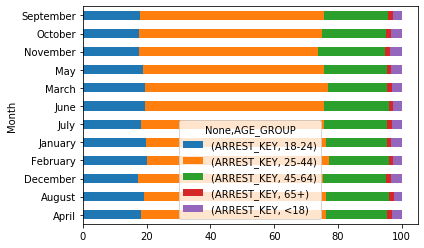

In [19]:
# plot to see the percentile by month and age group, Below graph concludes that 65+ age group has least arrest and 
#age group between 25-44 has highest amount of arrest

#plt.figure(figsize=(48,16))

mto.plot(kind='barh',stacked=True)
#fig, mto =plt.subplot(1,figsize=(48,16))
plt.show()

In [20]:
#mnt_arr1 = df.groupby(['Month','LAW_CAT_CD']).size()
#mnt_arr1

In [21]:
# understanding how many arrest by month and type of law codes category to normalize the arrest description as there 
# are lot of variations in arrest 'pd_description' chart cannot be plotted until i normalize the data
# creating pivot table to understand law category
mnt2_df=pd.pivot_table(df,index=['Month'],columns=['LAW_CAT_CD'], values=['ARREST_KEY'],aggfunc='count')
mnt2_df

ARREST_KEY              
LAW_CAT_CD          F   I     M   V
Month                              
April            4616  13  5645  25
August           6349  17  7206  35
December         5801  19  6704  41
February         5281  10  6213  27
January          6262  18  7107  26
July             6260  24  7144  36
June             5841  13  6852  24
March            6214  20  7582  28
May              5387  12  6271  33
November         5894  22  7037  25
October          6595  20  7688  49
September        6367  42  7183  36

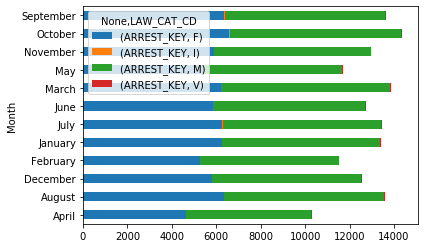

In [22]:
# stacked plot to understand which law category had highest crime, Category M which is represented by 
# green bar has the highest crime category
mnt2_df.plot(kind='barh',stacked=True)

In [23]:
# total law category code  count by arrest
dfc = df.groupby(['LAW_CAT_CD'])['ARREST_KEY'].count().sort_values(ascending=True)
dfc

LAW_CAT_CD
I      230
V      385
F    70867
M    82632
Name: ARREST_KEY, dtype: int64

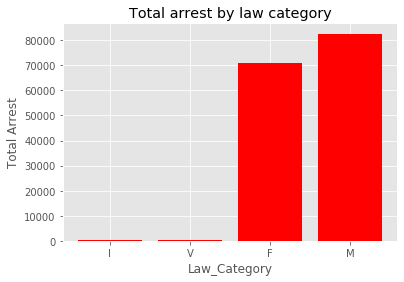

In [24]:
#graph to understand which law category had hightest crime rate
plt.style.use('ggplot')
x =['I','V','F','M']
Total = [230,385,70867,82632]
x_pos =[i for i,_ in enumerate(x)]

plt.bar(x_pos, Total, color='red')
plt.xlabel("Law_Category")
plt.ylabel("Total Arrest")
plt.title('Total arrest by law category')
plt.xticks(x_pos, x)
plt.show()

In [25]:
# dfc1=pd.pivot_table(df,index=['LAW_CAT_CD'],columns=['Month'], values=['ARREST_KEY'],aggfunc='count')
#dfc1

In [26]:

#mt=mnt2_df.div(mnt2_df.sum(axis=1),axis=0)*100
#mt

In [27]:
#mt.plot(kind='barh',stacked=True)

In [28]:
#counting unique arrest by boros
#df1 = df.groupby(['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=True)
#print(df1)

In [29]:
# understanding how many arrest by gender and boro
#df2 = df.groupby(['ARREST_BORO','PERP_SEX']).size()
#df2

In [30]:
# pivot chart to understand arrest by boro and gender
arrest=pd.pivot_table(df,index=['ARREST_BORO'],columns=['PERP_SEX'], values=['ARREST_KEY'],aggfunc='count')
arrest

ARREST_KEY       
PERP_SEX             F      M
ARREST_BORO                  
B                 6131  27887
K                 6894  34656
M                 6677  33000
Q                 5611  27440
S                 1284   5927

Text(0, 0.5, 'Total_Arrest')

<Figure size 432x288 with 0 Axes>

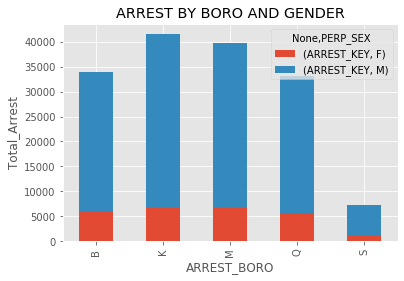

In [31]:
# stacked chart to understand arrest by boro and gender, this chart concludes that male have highger arrest
# compared to females
plt.figure(); arrest.plot.bar(title='ARREST BY BORO AND GENDER', stacked=True); plt.xlabel('ARREST_BORO'); plt.ylabel('Total_Arrest') 

In [32]:
# Overall conculsion is age group '25 to 44' males have highest crime in law code category 
# represented by M and residing in boro K